In [242]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import warnings
warnings.filterwarnings('ignore')

In [243]:
# Importação do dataset

df = pd.read_csv('data-test-analytics.csv')
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [43]:
new_df = df.copy()

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

In [45]:
## Conversão e padronização das colunas de data
nasc = new_df.birth_date.str.split(' ', expand=True).get(0)


# definir uma função personalizada para formatar a data
def format_date(date_str):
    year = int(date_str.split('/')[-1])
    if year < 100:
        year += 1900
    return '{}/{}/{}'.format(date_str[:2], date_str[3:5], year)

# aplicar a função na coluna 'birth_date' para formatar a data corretamente
new_df['birth_date'] = nasc.apply(format_date)
datas = ['created_at', 'updated_at', 'birth_date', 'deleted_at', 'last_date_purchase']

for k, v in enumerate(datas):
    new_df[v] = pd.to_datetime(new_df[v])
new_df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm


In [46]:
# Deleção de colunas que não são relevantes para essa análise
new_df.drop(['id', 'name_hash', 'email_hash', 'recency','address_hash'], axis=1, inplace=True)

# Coluna: Tempo na data de cancelamento desde a última compra
new_df['time_lastbuy'] = ((new_df['deleted_at'] - new_df['last_date_purchase']).dt.days/12)

# Coluna: Idade do cliente na data de cancelamento (em anos)
new_df['client_cancel_age'] = ((new_df['deleted_at'] - new_df['birth_date']).dt.days/365).round()

# Coluna: Tempo de vida da assinatura até a data de cancelamento (em meses)
new_df['client_time'] = ((new_df['deleted_at'] - new_df['created_at']).dt.days/12)

# Coluna: Ano do cancelamento da assinatura
new_df['year_cancel'] = new_df['deleted_at'].dt.year.astype(str).str.split('.',expand=True).get(0)

### Criando coluna de região para facilitar a compreensão geográfica do problema de negócios

In [47]:
# Dicionário de correspondência entre siglas e regiões
region_dict = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
               'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
               'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
               'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
               'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
               'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

# Mapeia as siglas dos estados para as regiões do Brasil
new_df['region'] = new_df['state'].map(region_dict)

In [244]:
# Entendendo a proporção regional dos clientes
new_df['region'].value_counts()/len(new_df)*100

Nordeste        32.50
Norte           26.55
Centro-Oeste    15.02
Sudeste         14.56
Sul             11.37
Name: region, dtype: float64

In [245]:
## Criação de duas colunas: Uma que referencia mês e ano de cadastro do cliente, 
## e outra que referencia o mês e ano de cancelamento de cadastro (se houver)

new_df["month_year_cancel"] = new_df["deleted_at"].dt.strftime("%Y-%m")
new_df["month_year_sign"] = new_df["created_at"].dt.strftime("%Y-%m")


## O mesmo para trimestres
new_df['quarter_sign'] = new_df['created_at'].dt.year.astype(str).str.cat(new_df['created_at'].dt.quarter.astype(str), sep='-')
new_df['quarter_cancel'] = new_df['deleted_at'].dt.year.astype(str).str.cat(new_df['deleted_at'].dt.quarter.astype(str), sep='-')
new_df['quarter_cancel'] = new_df['quarter_cancel'].replace('nan-nan', None)

In [10]:
# Importação da tabela de churn, calculada a partir do mesmo dataset
churn_table = pd.read_csv('churn_table.csv', index_col='Unnamed: 0')

# Estatísticas dos dados na tabela de churn, entre Novembro de 2016 e Novembro de 2019
churn_table[(churn_table['month-year']>='2016-11')&
            (churn_table['month-year']<'2019-11')].describe()

,cancelados,base_inicio,churn %
count,36.000000,36.000000,36.000000
mean,5.055556,4288.944444,0.109305
std,3.455385,1713.530623,0.053717
min,0.000000,1450.000000,0.000000
25%,2.750000,2855.500000,0.072070
50%,4.000000,4287.000000,0.120480
75%,7.250000,5708.000000,0.154665
max,12.000000,7114.000000,0.183517


## Gráfico indicativo do percentual de churns por mês ao longo do tempo

$$\text{Churn} = \frac{\text{Número de assinaturas canceladas no mês}}{\text{Número total de assinaturas ativas no início do mês}} \times 100$$

Entre Novembro de 2016 e Novembro de 2019, o índice de churn manteve-se relativamente estável em torno de 0,12%. No entanto, a partir dessa data, os números começaram a aumentar progressivamente, alcançando seu pico de cerca de 0,40% em Dezembro de 2020. Desde então, houve uma tendência de queda até Fevereiro de 2021.

É importante ressaltar que esse aumento no churn ocorreu simultaneamente ao crescimento linear no número de clientes ativos registrados em cada início de mês.

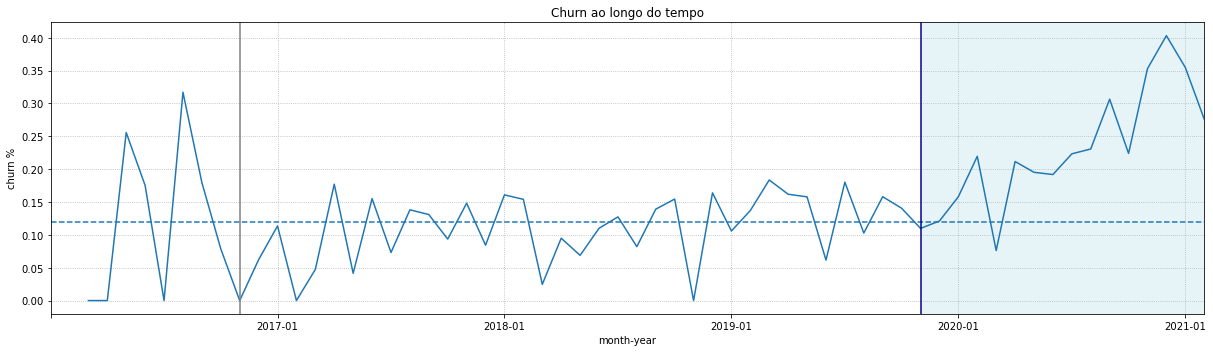

In [241]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month-year', y='churn %',
             data=churn_table)

plt.title('Churn ao longo do tempo')

plt.axhline(0.12, linestyle='--')
plt.axvline('2016-11', color='gray')
plt.axvline('2019-11', color='darkblue')
plt.axvspan('2019-11', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(np.arange(-1,60,12))#,rotation=90)
plt.grid(linestyle=':', axis='both')
#plt.gca().spines['top'].set_linewidth(0) # Remover borda superior
#plt.gca().spines['right'].set_linewidth(0) # Remover borda direita
plt.tight_layout()
#plt.savefig("graficos/churn.pdf", transparent=True)

### Gráfico do número de clientes ativos no início de cada mês

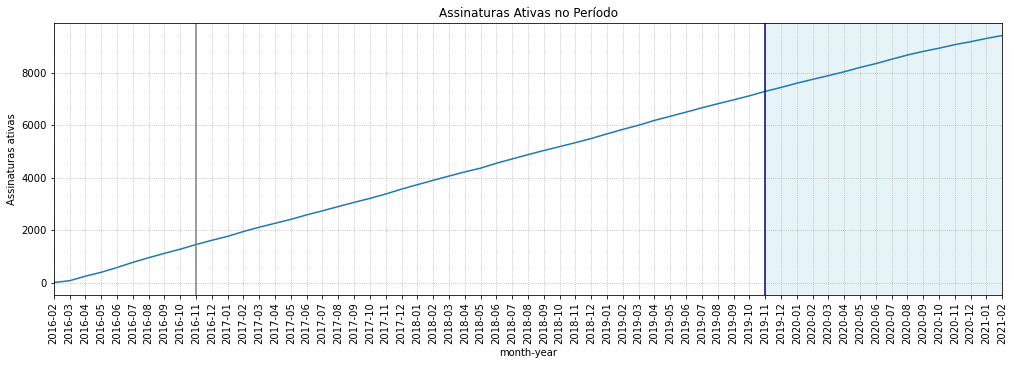

In [101]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month-year', y='base_inicio',
             data=churn_table)

plt.title('Assinaturas Ativas no Período')
plt.ylabel('Assinaturas ativas')

plt.axvline('2016-11', color='gray')
plt.axvline('2019-11', color='darkblue')
plt.axvspan('2019-11', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid(linestyle=':')

## Gráfico indicativo do número de cadastros por mês ao longo do tempo

- Vindo de queda desde Junho de 2020, a partir de Agosto de 2020 o número de novos cadastros permaneceu majoritariamente abaixo de 160

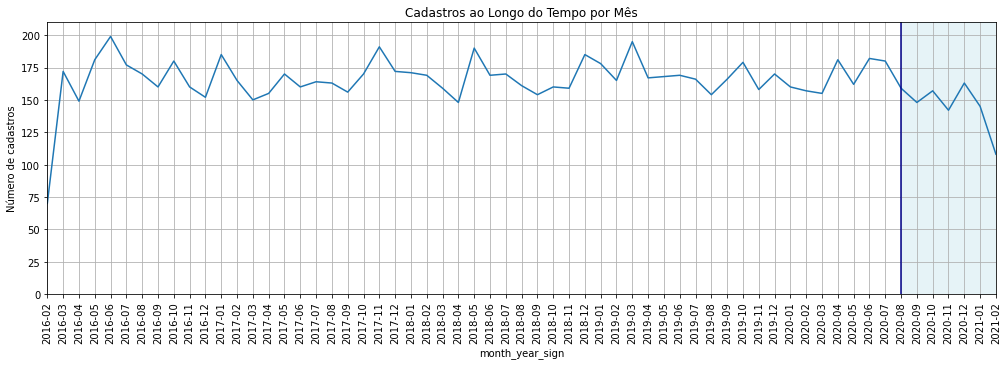

In [239]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status',
             data=new_df.groupby(['month_year_sign']).count().reset_index())

plt.title('Cadastros ao Longo do Tempo por Mês')
plt.ylabel('Número de cadastros')
plt.axvline('2020-08', color='darkblue')
plt.axvspan('2020-08', '2021-02', alpha=0.3, color='lightblue')

plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.ylim(0,210)
plt.grid();

### Observando os dados de maneira trimestral, é possivel notar que após o 2º trimestre de 2020 o número de novos cadastros vem caindo

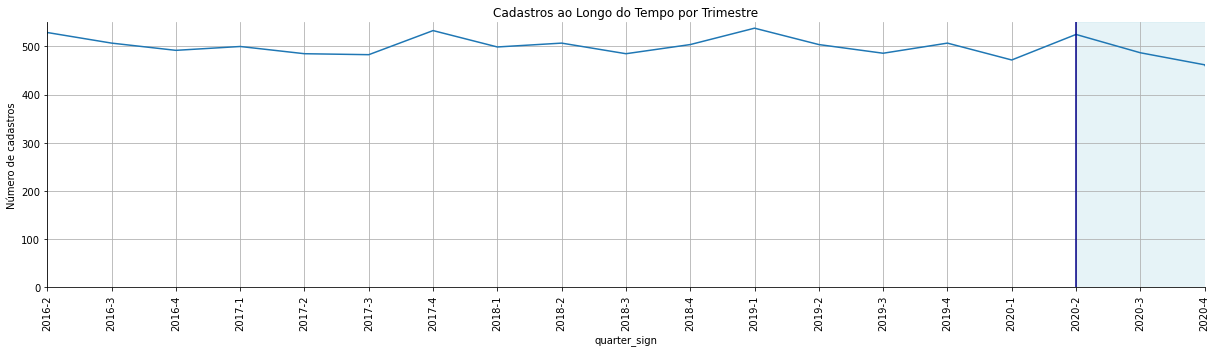

In [238]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status',
             data=new_df.groupby(['quarter_sign']).count().reset_index())

plt.title('Cadastros ao Longo do Tempo por Trimestre')
plt.ylabel('Número de cadastros')
plt.axvline('2020-2', color='darkblue')
plt.axvspan('2020-2', '2020-5', alpha=0.3, color='lightblue')

plt.xlim('2016-2', '2020-4')
plt.ylim(0,550)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_linewidth(0) # Remover borda superior
plt.gca().spines['right'].set_linewidth(0) # Remover borda direita
plt.grid()
plt.tight_layout()
#plt.savefig("graficos/cadastros.pdf", transparent=True)

## Gráfico indicativo do número de cadastros por mês ao longo do tempo separado por região geográfica

Ao analisar o gráfico de distribuição de assinaturas por região, é possível notar que as regiões Norte e Nordeste são as que mais concentram os clientes do serviço. Além disso, ao comparar com o gráfico de novos cadastros, percebe-se que a região Nordeste apresentou picos e vales extremos a partir de agosto de 2020. Por outro lado, a região Sul teve seu menor número de novos cadastros em outubro de 2020, quando registrou menos de 10 novos clientes pela primeira vez.

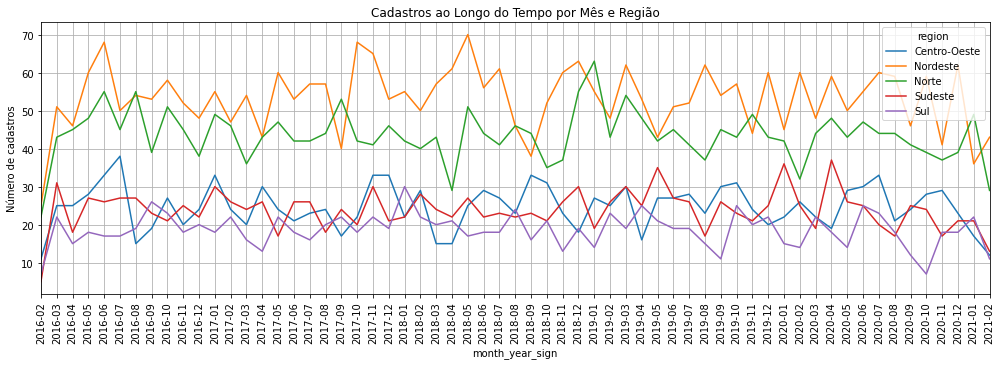

In [105]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status', hue='region',
             data=new_df.groupby(['month_year_sign', 'region']).count().reset_index())

plt.title('Cadastros ao Longo do Tempo por Mês e Região')
plt.ylabel('Número de cadastros')
plt.xlim('2016-02', '2021-02')
plt.xticks(rotation=90)
plt.grid();

### Observando os dados de maneira trimestral, é possível notar que após o 2º trimestre de 2020 o número de cadastros na região Norte vem caindo, sendo o 4º trimestre aquele que registrou o menor numero de cadastros em todo o periodo observado

É possível observar no gráfico que as regiões Sul e Sudeste também apresentaram uma tendência de queda no número de novos cadastros, seguindo a mesma tendência das regiões Norte e Nordeste. 

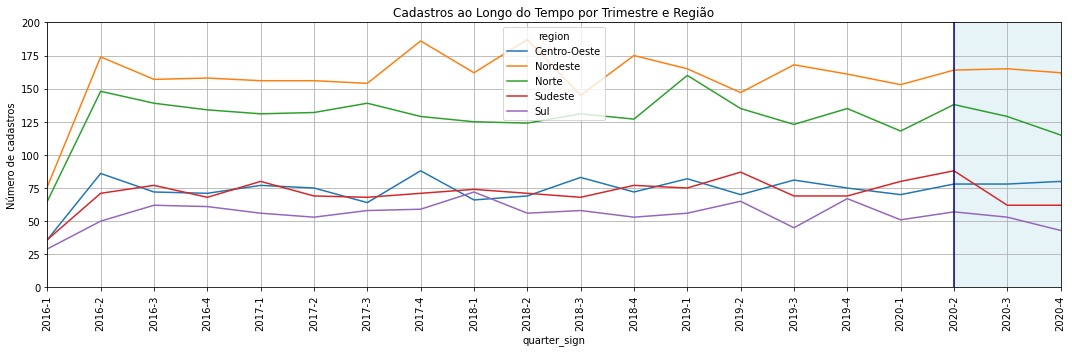

In [236]:
plt.figure(figsize=(15,5))
sns.lineplot(x='quarter_sign', y='status', hue='region',
             data=new_df.groupby(['quarter_sign', 'region']).count().reset_index())

plt.title('Cadastros ao Longo do Tempo por Trimestre e Região')
plt.ylabel('Número de cadastros')
plt.axvline('2020-2', color='darkblue')
plt.axvspan('2020-2', '2020-5', alpha=0.3, color='lightblue')

plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.ylim(0,200)

plt.grid()
plt.tight_layout()
#plt.savefig("graficos/cad_reg.pdf", transparent=True)

## Gráfico indicativo do número de cadastros por mês ao longo do tempo se parado por canal em que o cadastro de assinatura foi realizado

Entre os canais que convertem mais assinaturas, destacam-se o Organic Search e o Direct. No entanto, é preocupante notar que, a partir de dezembro de 2020, esses canais, juntamente com o Telegram/WhatsApp, vêm apresentando uma tendência constante de queda na conversão de novas assinaturas. Essa queda pode indicar que as estratégias de marketing e a oferta de serviços não estão mais atraindo o público-alvo de forma eficiente, o que pode estar contribuindo para o aumento do churn.

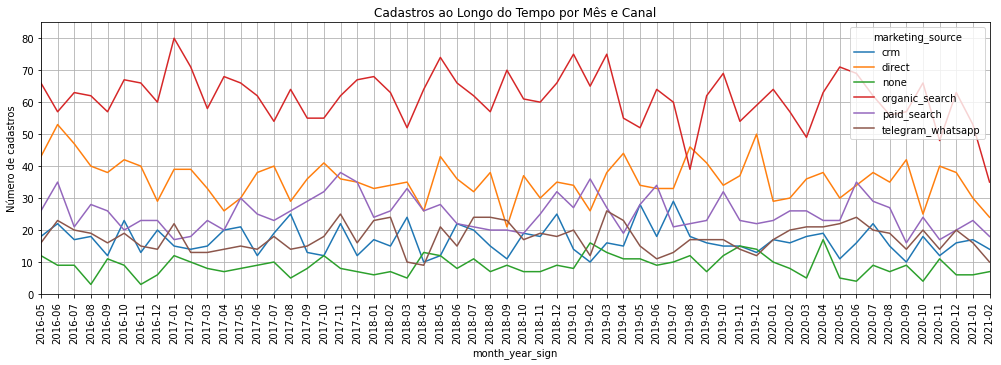

In [111]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_sign', y='status', hue='marketing_source',
             data=new_df.groupby(['month_year_sign', 'marketing_source']).count().reset_index())

plt.title('Cadastros ao Longo do Tempo por Mês e Canal')
plt.ylabel('Número de cadastros')
plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)
plt.ylim(0,85)
plt.grid();

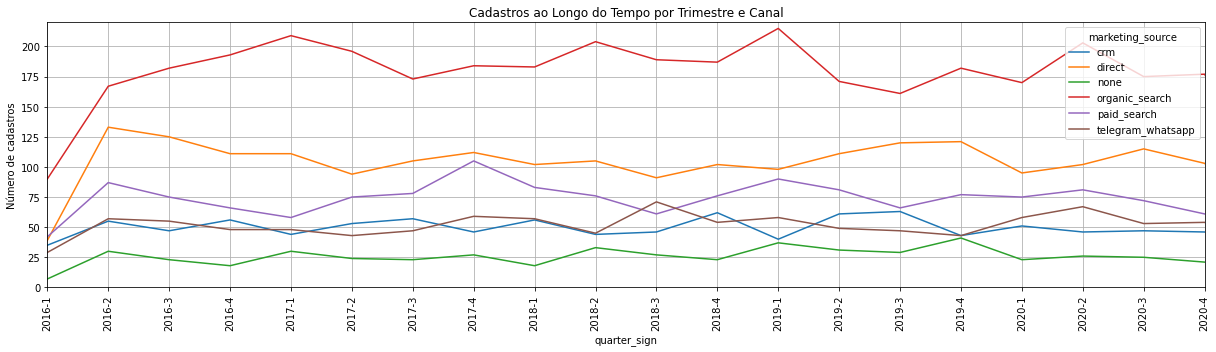

In [235]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_sign', y='status', hue='marketing_source',
             data=new_df.groupby(['quarter_sign', 'marketing_source']).count().reset_index())

plt.title('Cadastros ao Longo do Tempo por Trimestre e Canal')
plt.ylabel('Número de cadastros')
plt.xlim('2016-1', '2020-4')
plt.xticks(rotation=90)
plt.ylim(0,220)
plt.grid()
plt.tight_layout()
#plt.savefig("graficos/cad_canal.pdf", transparent=True)

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo

Apesar da constância do número de novos cadastros, tanto por região quanto por canal de conversão de assinatura, é possível observar que a partir de agosto de 2018 o número de cancelamentos por mês teve um ligeiro aumento, com um crescimento mais pronunciado a partir do final de 2019. 

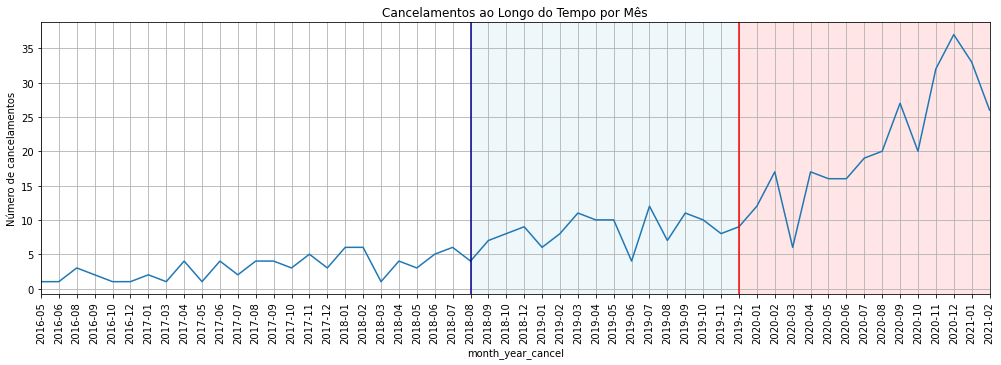

In [234]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             data=new_df.groupby(['month_year_cancel']).count().reset_index())

plt.title('Cancelamentos ao Longo do Tempo por Mês')
plt.ylabel('Número de cancelamentos')
plt.xlim('2016-05', '2021-02')
plt.xticks(rotation=90)

plt.axvline('2018-08', color='darkblue')
plt.axvline('2019-12', color='red')
plt.axvspan('2018-08', '2019-12', alpha=0.2, color='lightblue')
plt.axvspan('2019-12', '2021-02', alpha=0.1, color='red')

plt.grid();

### Analisando esses dados de maneira trimestral, é claro o crescimento do número absoluto de cancelamentos, sendo mais pronunciada a curva de crescimento a partir do 4º trimestre de 2019

Com base nas informações coletadas, é possível fazer algumas observações relevantes sobre o comportamento dos clientes:

- A partir do ano de 2019, já havia um aumento na frequência de cancelamentos de assinaturas;
- Esse fenômeno se intensificou no ano de 2020, com um crescimento recorde no número de cancelamentos, chegando a cerca de 89 no 4º semestre.

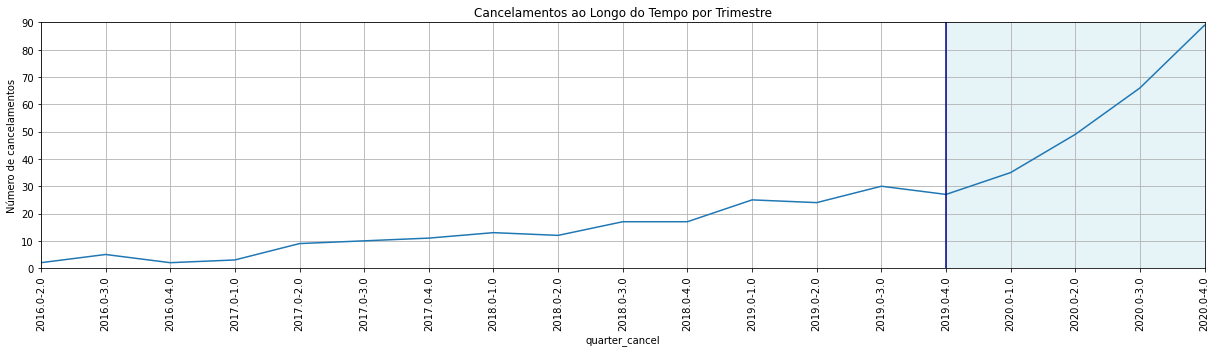

In [233]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             data=new_df.groupby(['quarter_cancel']).count().reset_index())

plt.title('Cancelamentos ao Longo do Tempo por Trimestre')
plt.ylabel('Número de cancelamentos')
plt.axvline('2019.0-4.0', color='darkblue')
plt.axvspan('2019.0-4.0', '2020.0-4.0', alpha=0.3, color='lightblue')

plt.xlim('2016.0-2.0', '2020.0-4.0')
plt.ylim(0,90)
plt.xticks(rotation=90)

#plt.gca().spines['top'].set_linewidth(0) # Remover borda superior
#plt.gca().spines['right'].set_linewidth(0) # Remover borda direita
plt.grid()
plt.tight_layout()
#plt.savefig("graficos/cancel.pdf", transparent=True);

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo por região geográfica

Ao analisar o gráfico, é evidente que o número de cancelamentos por região começa a se destacar a partir de Outubro de 2019, com maior impacto nas regiões Norte e Nordeste, que historicamente lideram em número de novos cadastros por mês. O pico de cancelamentos nessas regiões acontece no final do ano de 2020, evidenciando o mesmo padrão observado no aumento de cancelamentos em todo o país nesse período.

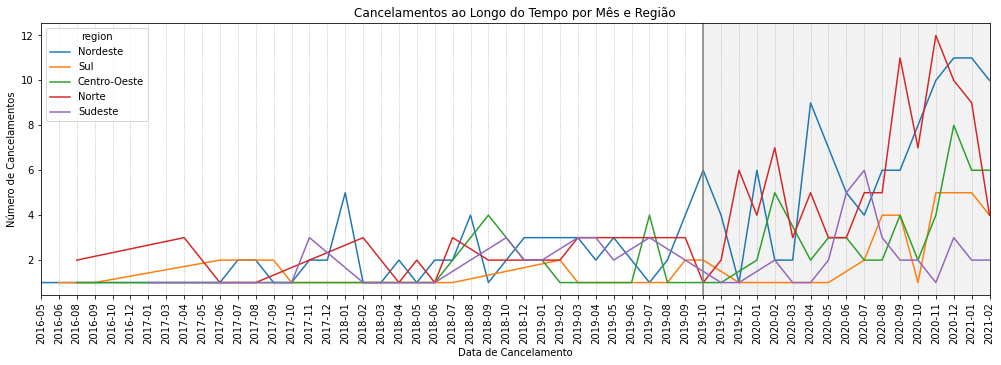

In [232]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['month_year_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')


plt.title('Cancelamentos ao Longo do Tempo por Mês e Região')

plt.grid(linestyle=':', axis='x');

### Analisando os mesmos dados, agora de maneira trimestral, é interessante observar que:

No gráfico abaixo, é possível notar que o aumento no número de cancelamentos nas regiões Norte e Nordeste segue a mesma tendência do gráfico geral de cancelamentos, sugerindo que o comportamento dessas regiões tenha grande influência na onda observada. Além disso, as demais regiões também apresentam tendência de crescimento, com destaque para a região Centro-Oeste, que vem aumentando o número de cancelamentos trimestre a trimestre desde o 4º trimestre de 2019. Esse padrão pode indicar que fatores específicos das regiões, como concorrência ou mudanças econômicas, estejam influenciando a decisão dos clientes em cancelar suas assinaturas.

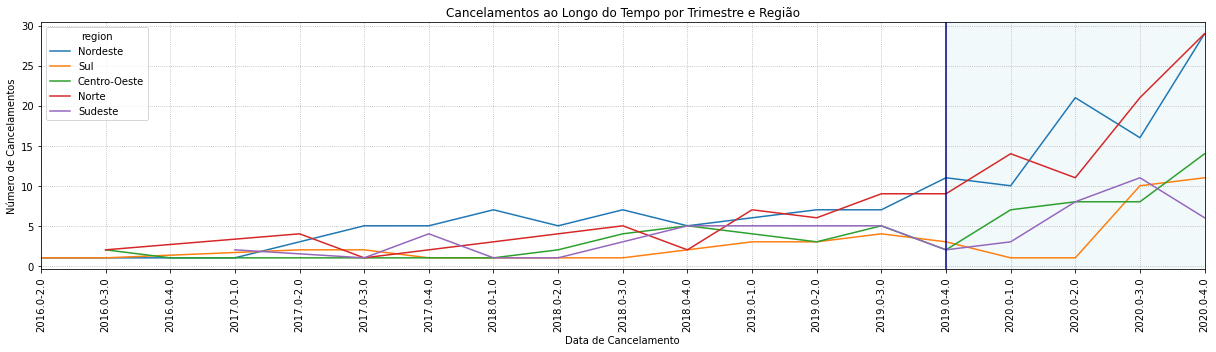

In [231]:
plt.figure(figsize=(17,5))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['quarter_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.axvline('2019.0-4.0', color='darkblue')
plt.axvspan('2019.0-4.0', '2020.0-4.0', alpha=0.15, color='lightblue')


plt.title('Cancelamentos ao Longo do Tempo por Trimestre e Região')

plt.grid(linestyle=':')
#plt.gca().spines['top'].set_linewidth(0) # Remover borda superior
#plt.gca().spines['right'].set_linewidth(0) # Remover borda direita
plt.tight_layout()
#plt.savefig("graficos/cancel_reg.pdf", transparent=True);

## Gráfico indicativo do número de cancelamentos por mês ao longo do tempo por região geográfica por canal em que o cadastro de assinatura foi realizado

No gráfico apresentado, observa-se que a maior movimentação de cancelamentos ocorreu no canal de busca orgânica a partir de outubro de 2019, sendo que o pico de cancelamentos nesse canal coincidiu com o período em que as regiões Norte e Nordeste também apresentaram suas maiores taxas de cancelamento, no final de 2020. Além disso, o canal de Direct também apresentou destaque nesse período.

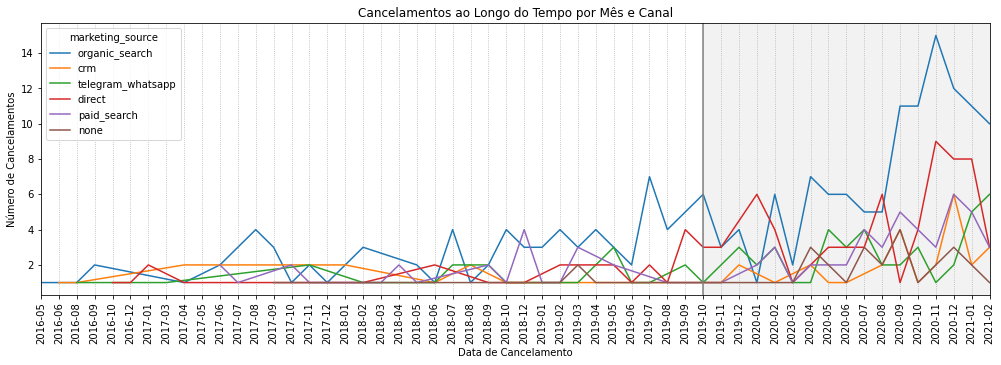

In [230]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['month_year_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')

plt.title('Cancelamentos ao Longo do Tempo por Mês e Canal')

plt.grid(linestyle=':', axis='x');

### Analisando os mesmos dados de maneira trimestral

É notável que, embora os canais de Direct e Organic Search sejam os que mais contribuem para o número de cancelamentos, os demais canais também apresentam um crescimento no número de cancelamentos. Isso indica que é necessário analisar todos os canais de aquisição de clientes, a fim de identificar as possíveis causas do aumento do número de cancelamentos.

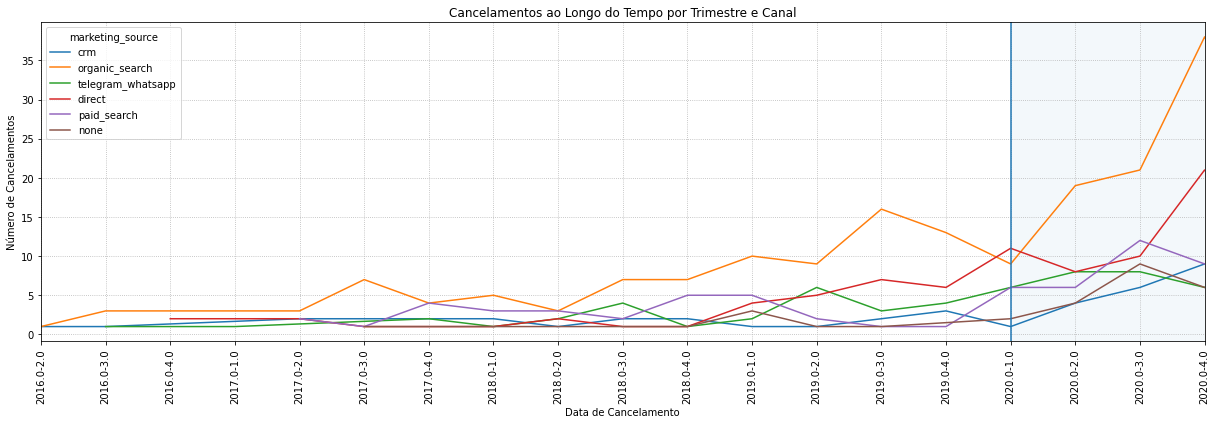

In [229]:
plt.figure(figsize=(17,6))
sns.lineplot(x='quarter_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['quarter_cancel', 'marketing_source']).count().reset_index())

plt.axvline('2020.0-1.0')
plt.axvspan('2020.0-1.0','2020.0-4.0', alpha=0.05)


plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.title('Cancelamentos ao Longo do Tempo por Trimestre e Canal')

#plt.gca().spines['top'].set_linewidth(0) # Remover borda superior
#plt.gca().spines['right'].set_linewidth(0) # Remover borda direita
plt.grid(linestyle=':')
plt.tight_layout()
#plt.savefig("graficos/cancel_canal.pdf", transparent=True);

# Proporção dos cancelamentos | 2019 x 2020

### Observando a diferença de comportamento dos clientes que cancelaram suas assinaturas antes e depois de 2020, é interessante analisar como as proporções de cancelamentos por região e canal mudaram entre os anos de 2019 e 2020.

Em relação às regiões, houve um aumento proporcional no número de cancelamentos nas regiões Norte, Nordeste e Centro-Oeste de 2019 para 2020. Por outro lado, as regiões Sul e Sudeste apresentaram diminuição proporcional no número de cancelamentos.

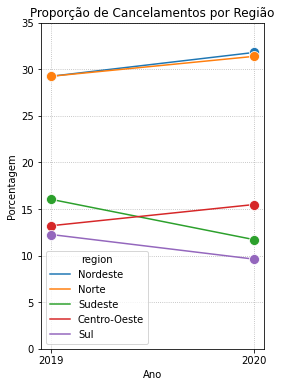

In [122]:
testando = new_df[(new_df['status'] == 'canceled') &
       (new_df['quarter_cancel'] < '2021.0-01.0') & 
       (new_df['year_cancel'] >= '2019')
       ].groupby('year_cancel')['region'].\
       value_counts().to_frame().rename(columns={'region': 'region_count'}).reset_index()

testando2 = testando.groupby(['year_cancel']).sum().reset_index()

testando3 = testando.merge(testando2, how='left', on='year_cancel')
testando3['pct'] = (testando3['region_count_x']/testando3['region_count_y'])*100

plt.figure(figsize=(4,6))
sns.lineplot(x='year_cancel',
            y='pct', hue='region',
            data=testando3, marker='o', markersize=10)

plt.title('Proporção de Cancelamentos por Região')
plt.ylabel('Porcentagem')
plt.xlabel('Ano')

#plt.xlim(2.75, 4.25)
plt.ylim(0,35)
plt.grid(linestyle=':');

### Quanto aos canais de conversão

- Houve um aumento proporcional no número de cancelamentos nos canais de Paid Search, CRM e None (não identificado) entre 2019 e 2020;
- Organic Search e Telegram/Whatsapp apresentaram uma diminuição proporcional no número de cancelamentos entre os anos de 2019 e 2020;
- O canal Direct manteve a mesma proporção de cancelamentos entre os anos de 2019 e 2020.

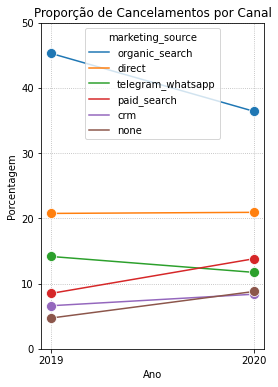

In [123]:
testando = new_df[(new_df['status'] == 'canceled') &
       (new_df['quarter_cancel'] < '2021.0-01.0') & 
       (new_df['year_cancel'] >= '2019')
       ].groupby('year_cancel')['marketing_source'].\
       value_counts().to_frame().rename(columns={'marketing_source': 'marketing_source_count'}).reset_index()


testando2 = testando.groupby(['year_cancel']).sum().reset_index()
testando3 = testando.merge(testando2, how='left', on='year_cancel')

testando3['pct'] = (testando3['marketing_source_count_x']/testando3['marketing_source_count_y'])*100
plt.figure(figsize=(4,6))
sns.lineplot(x='year_cancel',
            y='pct', hue='marketing_source',
            data=testando3, marker='o', markersize=10)

plt.title('Proporção de Cancelamentos por Canal')
plt.ylabel('Porcentagem')
plt.xlabel('Ano')

#plt.xlim(2.75, 4.25)
plt.ylim(0,50)
plt.grid(linestyle=':');

Uma possível explicação para o aumento proporcional de cancelamentos nas regiões Norte, Nordeste e Centro-Oeste e a diminuição nas regiões Sul e Sudeste pode estar relacionada a fatores socioeconômicos e culturais distintos entre essas regiões, como diferenças no poder aquisitivo, oferta de serviços similares, entre outros.

O aumento proporcional no número de cancelamentos nos canais de Paid Search, CRM e None pode indicar que esses canais estão atraindo um público menos engajado ou que não está encontrando o que esperava ao adquirir o serviço.

A diminuição proporcional no número de cancelamentos em Organic Search e Telegram/Whatsapp pode indicar que esses canais estão atraindo um público mais engajado ou que está encontrando o que esperava ao adquirir o serviço.

# Comportamento dos cancelamentos | Antes e A Partir de 2020

### Em alguns tópicos, é interassante observar que:
- No Nordeste, observou-se um aumento no número de cancelamentos por parte dos assinantes que estavam há mais de 60 meses sem fazer uma compra. Além disso, houve um aumento na variância do comportamento dessas pessoas, como indicado pelo aumento do tamanho do interquartil (a "caixa laranja" que representa 50% dos dados);
- No Centro-Oeste, notou-se que cerca de 75% dos cancelamentos são feitos por assinantes que estão até 20 meses sem fazer uma compra, indicando que o comportamento desses assinantes se tornou mais consistente. Isso significa que essas pessoas têm uma maior probabilidade de cancelar a assinatura em um determinado período, em comparação com outros períodos;
- Os cancelamentos feitos por meio dos canais Organic Search e Direct apresentaram interquartis menores, o que indica que os assinantes que vieram por esses meios têm um comportamento mais consistente em relação à decisão de cancelar a assinatura dentro de um período específico (até 30 meses). Ou seja, essas pessoas são mais propensas a cancelar dentro desse período do que em outros momentos;
- Os assinantes que vieram por meio de Paid Search apresentam um comportamento mais disperso, o que significa que há inconsistência em relação ao momento em que essas pessoas optam pelo cancelamento da assinatura. A dispersão do comportamento dos assinantes que vieram por meio de Paid Search pode estar relacionada a uma grande variedade de perfis de clientes que foram atraídos por diferentes tipos de campanhas. Por exemplo, uma campanha que oferece descontos pode atrair clientes mais sensíveis a preço, enquanto outra campanha que destaca a qualidade do serviço pode atrair clientes mais exigentes.

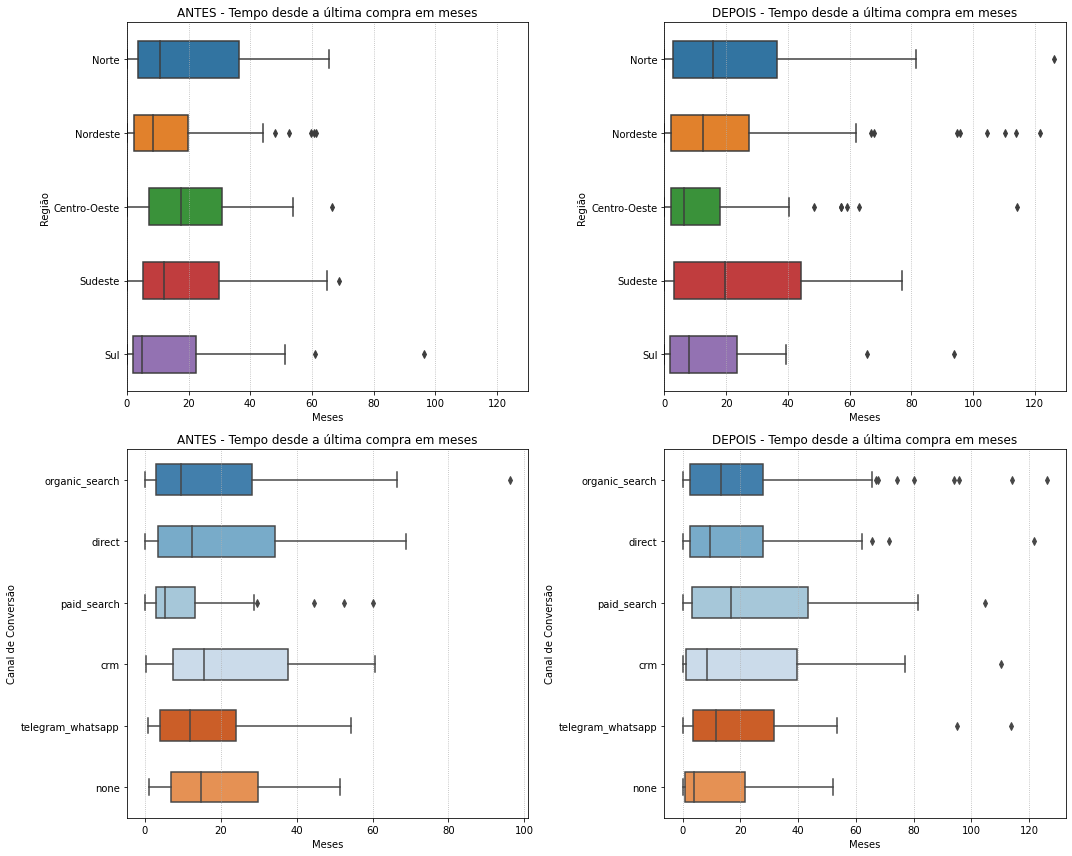

In [54]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] <= '2019-12')]
dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12')]

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(15, 12))


sns.boxplot(x='time_lastbuy', y='region',data=dados_antes, width=0.5,
        order=['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'], ax=axs[0,0])

axs[0,0].set_title('ANTES - Tempo desde a última compra em meses')
axs[0,0].set_xlim(0,130)
axs[0,0].grid(linestyle=':', axis='x')


sns.boxplot(x='time_lastbuy', y='region',data=dados_depois, width=0.5,
           order=['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'], ax=axs[0,1])

axs[0,1].set_title('DEPOIS - Tempo desde a última compra em meses')
axs[0,1].set_xlim(0,130)
axs[0,1].grid(linestyle=':', axis='x')


sns.boxplot(x='time_lastbuy', y='marketing_source', data=dados_antes, width=0.5,
            order=['organic_search', 'direct', 'paid_search', 'crm', 'telegram_whatsapp', 'none'],
            ax=axs[1,0], palette='tab20c')
axs[1,0].set_title('ANTES - Tempo desde a última compra em meses')
axs[0,0].set_xlim(0,130)
axs[1,0].grid(linestyle=':', axis='x')


sns.boxplot(x='time_lastbuy', y='marketing_source', data=dados_depois, width=0.5,
            order=['organic_search', 'direct', 'paid_search', 'crm', 'telegram_whatsapp', 'none'],
            ax=axs[1,1], palette='tab20c')
axs[1,1].set_title('DEPOIS - Tempo desde a última compra em meses')
axs[0,0].set_xlim(0,130)
axs[1,1].grid(linestyle=':', axis='x')

for idx, ax in enumerate(axs.flatten()):
    ax.set_xlabel('Meses')
    if idx in (0,1):
        ax.set_ylabel('Região')
    else:
        ax.set_ylabel('Canal de Conversão')
plt.tight_layout()
plt.show()

A consistência do comportamento dos assinantes em relação ao tempo sem fazer uma compra pode indicar que a plataforma precisa repensar a oferta de produtos ou serviços para manter os clientes engajados. Por exemplo, é possível que a plataforma esteja atraindo muitos clientes que não encontram o que desejam ou que não se beneficiam das ofertas.

# Tempo de assinatura do cliente

Com base nas informações apresentadas no gráfico abaixo, podemos inferir que houve uma mudança no perfil de cancelamento de assinaturas entre 2019 e 2020. No ano de 2020, a distribuição dos dados é mais disperas, informando que clientes com menos tempo de assinatura e aqueles com vários meses de assinatura optaram pelo cancelamento. Além disso, a variação maior de dados em 2020 também sugere que os motivos de cancelamento podem estar mais diversificados do que no ano de 2019.

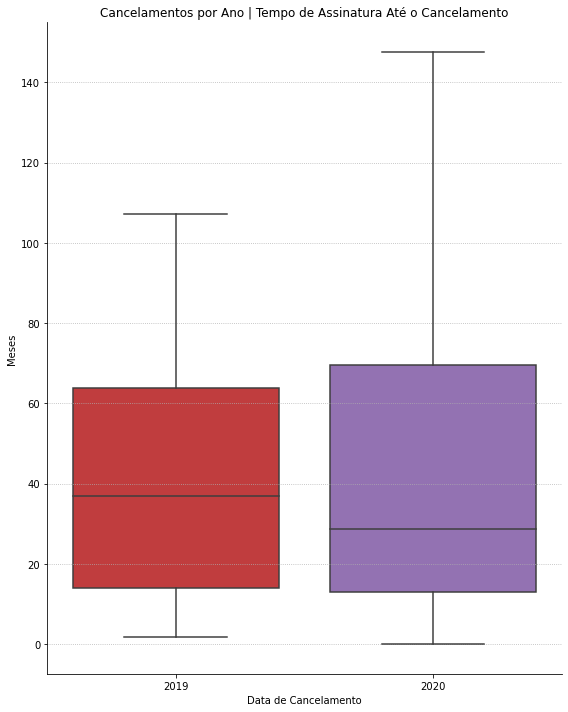

In [222]:
plt.figure(figsize=(8,10))
sns.boxplot(x='year_cancel', y='client_time', 
             #hue='marketing_source', 
             data=new_df.groupby(['year_cancel']).value_counts().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Meses')
#plt.yticks(np.arange(0,5,0.5))
#plt.xticks(rotation=90)
plt.xlim(2.5, 4.5)

plt.title('Cancelamentos por Ano | Tempo de Assinatura Até o Cancelamento')

plt.grid(linestyle=':', axis='y')
plt.gca().spines['top'].set_linewidth(0) # Remover borda superior
plt.gca().spines['right'].set_linewidth(0) # Remover borda direita
plt.tight_layout()
plt.savefig("graficos/client_time.pdf", transparent=True);

### Colocando tempo mediano de assinatura dos clientes numa linha do tempo

O gráfico abaixo mostra que a partir de dezembro de 2019, com exceção de um outlier em março de 2020, o tempo mediano de assinatura vem apresentando tendência de queda. Essa tendência sugere que, cada vez mais, novos clientes estão optando pelo cancelamento antecipado, o que pode ser preocupante para a empresa.

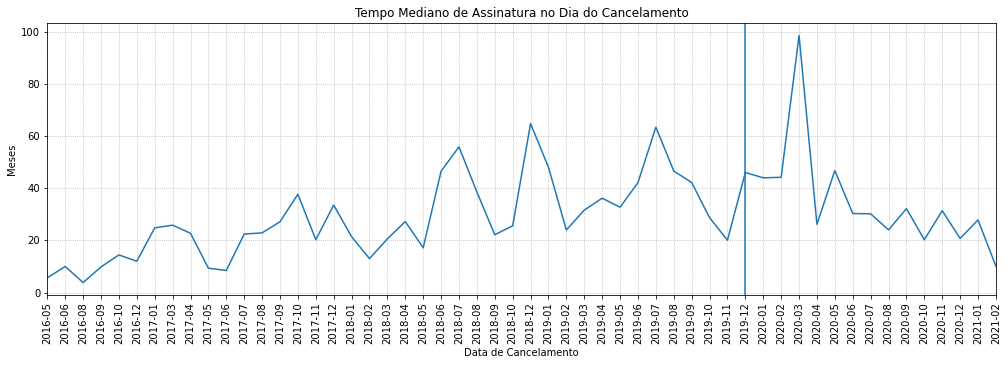

In [227]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='client_time', 
             #hue='marketing_source', 
             data=new_df.groupby(['month_year_cancel']).median().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Meses')
plt.axvline('2019-12')
plt.xticks(rotation=90)
plt.xlim(0, 53)

plt.title('Tempo Mediano de Assinatura no Dia do Cancelamento')

plt.grid(linestyle=':');

Analisando o comportamento trimestral dos cancelamentos, é evidente que a partir do primeiro trimestre de 2020, o tempo médio de duração da assinatura dos clientes que optam pelo cancelamento está diminuindo cada vez mais.

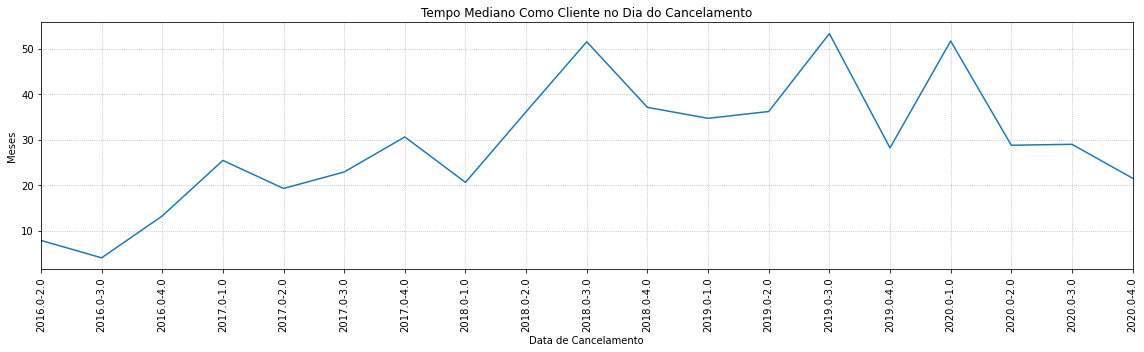

In [225]:
plt.figure(figsize=(16,5))
sns.lineplot(x='quarter_cancel', y='client_time', 
             #hue='marketing_source', 
             data=new_df.groupby(['quarter_cancel']).median().reset_index())#,marker='o', markersize=8)

plt.xlabel('Data de Cancelamento')
plt.ylabel('Meses')
plt.xticks(rotation=90)
plt.xlim('2016.0-2.0', '2020.0-4.0')

plt.title('Tempo Mediano Como Cliente no Dia do Cancelamento')
#plt.gca().spines['top'].set_linewidth(0) # Remover borda superior
#plt.gca().spines['right'].set_linewidth(0) # Remover borda direita
plt.grid(linestyle=':')
plt.tight_layout()
#plt.savefig("graficos/cliente_time_line.pdf", transparent=True);

# Investigando quando foram criadas as assinaturas dos cancelamentos que ocorreram a partir de 2020

### Sendo o ano de 2020 o período crítico de cancelamentos, e sabendo que cada vez mais assinantes com pouco tempo de assinatura estão optando pelo cancelamento, é interessante observar quando esses clientes assinaram o serviço

Dos clientes que optaram pelo cancelamento de suas assinaturas a partir de 2020, cerca de 66% iniciaram suas assinaturas em 2019 ou posteriormente. Além disso, é interessante notar que 33 desses cancelamentos se refere a pessoas que se cadastraram apenas no 2º trimestre de 2020, o que indica que o cancelamento antecipado pode ser uma tendência para novos clientes.

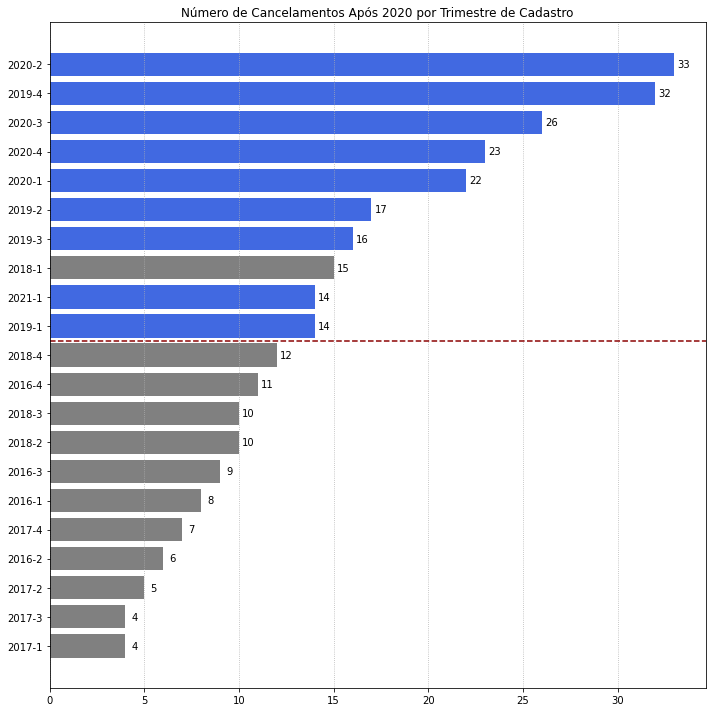

In [147]:
# Calculo para retornar quando os cancelamentos pós 2020 foram cadastrados
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12')].\
        groupby('quarter_sign').\
        count().reset_index()[['quarter_sign','created_at']].sort_values('created_at', ascending=True)

color = ['royalblue' if v >= '2019-1' else 'gray' for v in dados.quarter_sign]

plt.figure(figsize=(10,10))
bars = plt.barh(dados.quarter_sign, dados.created_at, color=color)
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, 
             dados.created_at.iloc[i], ha='center', va='center')

#plt.axvline(12, color='darkred')
plt.axhline(10.5, color='darkred', linestyle='--')
plt.xticks(np.arange(0, 35, step=5))

plt.title('Número de Cancelamentos Após 2020 por Trimestre de Cadastro')

#plt.gca().spines['bottom'].set_linewidth(0) # Remover borda inferior
#plt.gca().spines['right'].set_linewidth(0) # Remover borda direita
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/cad_cancel.pdf", transparent=True);

In [64]:
## Número de cancelamentos de pessoas cadastradas a partir de 2019
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12') &
        (new_df['quarter_sign'] >= '2019-1')]

print(f'{dados.shape[0]} cancelamentos')

197 cancelamentos


In [65]:
## Número de cancelamentos de pessoas cadastradas antes de 2019
dados = new_df[(new_df['status']=='canceled') &
        (new_df['month_year_cancel'] > '2019-12') &
        (new_df['quarter_sign'] < '2019-1')]

print(f'{dados.shape[0]} cancelamentos')

101 cancelamentos


### Dessas pessoas que se cadastraram depois 2019 e cancelaram suas assinaturas a partir de 2020

- Em todas as regiões, houve um aumento no número de cancelamentos de assinaturas, com destaque para as regiões Norte, Nordeste, Centro-Oeste e Sul;
- No que diz respeito aos canais de conversão, Organic Search e Direct foram os que mais se destacaram em termos de crescimento, o que sugere que esses canais estão atraindo um público que, infelizmente, está optando pelo cancelamento;
- É possível que haja alguma relação entre o aumento do cancelamento de assinaturas e a pandemia de COVID-19, uma vez que a partir de 2020 houve uma série de mudanças significativas no comportamento do consumidor.

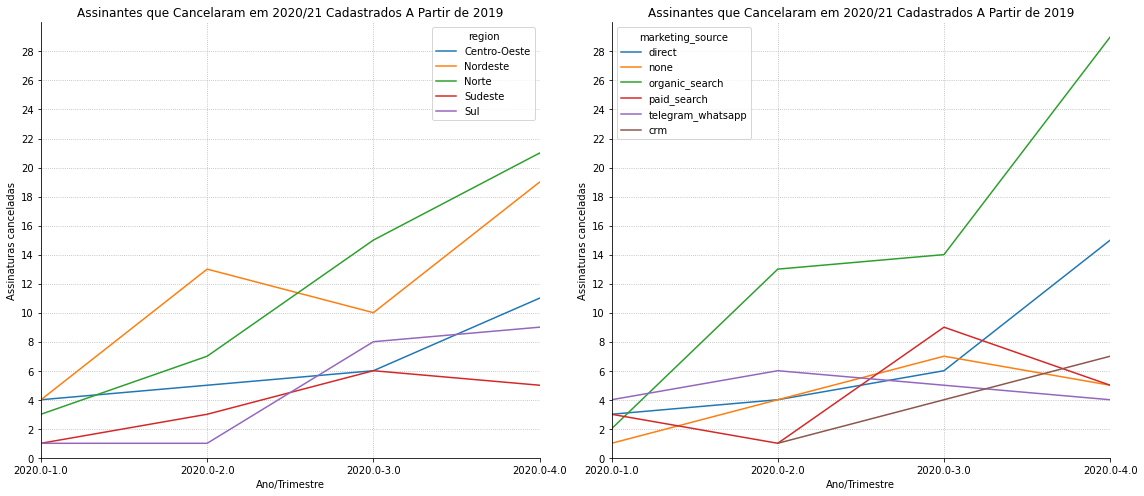

In [175]:
dados1 = new_df[(new_df['status']=='canceled') &
        (new_df['quarter_cancel'] > '2019.0-4.0') &
        (new_df['quarter_sign'] > '2018-4')].groupby(['quarter_cancel','region'])\
        [['region','quarter_cancel']].\
        value_counts().to_frame().rename(columns={0: 'count'}).reset_index()

dados2 = new_df[(new_df['status']=='canceled') &
        (new_df['quarter_cancel'] > '2019.0-4.0') &
        (new_df['quarter_sign'] > '2018-4')].groupby(['quarter_cancel','marketing_source'])\
        [['quarter_cancel', 'marketing_source']].\
        value_counts().to_frame().rename(columns={0: 'count'}).reset_index()

#plt.figure(figsize=(8,6))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,7))

sns.lineplot(x='quarter_cancel', y='count', hue='region',
             data=dados1,
             #marker='o', markersize=10,
             ci=0, ax=ax[0])
sns.lineplot(x='quarter_cancel', y='count', hue='marketing_source',
             data=dados2,
             #marker='o', markersize=10,
             ci=0, ax=ax[1])

for i, j in enumerate(ax):
    ax[i].set_xlabel('Ano/Trimestre')
    ax[i].set_ylabel('Assinaturas canceladas')
    ax[i].set_xlim(0, 3)
    ax[i].set_ylim(0,30)
    ax[i].set_yticks(np.arange(0,30,2))
    ax[i].spines['top'].set_linewidth(0) # Remover borda superior
    ax[i].spines['right'].set_linewidth(0) # Remover borda direita
    ax[i].grid(linestyle=':')
    ax[i].set_title('Assinantes que Cancelaram em 2020/21 Cadastrados A Partir de 2019')
    
plt.tight_layout()
#plt.savefig("graficos/cad_cancel_info.pdf", transparent=True)

### Comparando o comportamento de compras dos assinantes que cancelaram suas assinaturas a partir de 2020, entre aqueles que se cadastraram antes e depois do ano de 2019

#### *São mostrados tanto o boxplot quando o violin plot dos gráficos comparativos*

Analisando o gráfico abaixo, é possível notar que a população que se cadastrou após 2019 apresenta uma distribuição com menor variação quanto ao tempo desde a última compra até a data de cancelamento da assinatura. Essa característica indica que essas pessoas possuem hábitos de compra mais semelhantes, o que pode ser um indicativo para aprimorar as estratégias de retenção de clientes, considerando perfis de comportamento de cancelamento mais homogêneos.

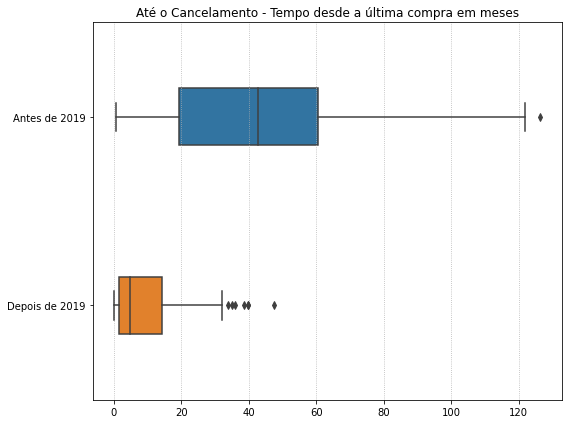

In [226]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.boxplot(data=[dados_antes['time_lastbuy'], 
                  dados_depois['time_lastbuy']],
                  orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Até o Cancelamento - Tempo desde a última compra em meses')
plt.xticks(np.arange(0,140,20))
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/box1.pdf", transparent=True)
plt.show()

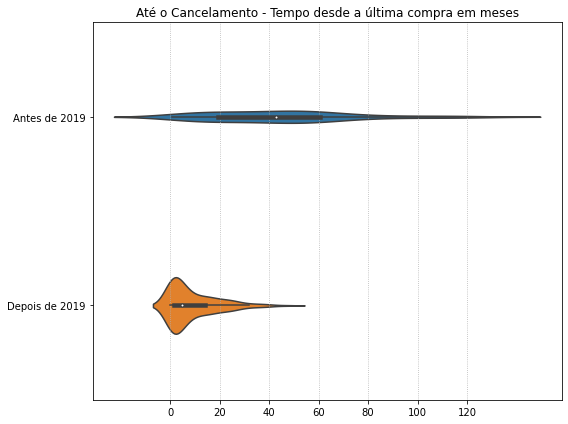

In [201]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]

plt.figure(figsize=(8,6))
sns.violinplot(data=[dados_antes['time_lastbuy'], 
                     dados_depois['time_lastbuy']],
               orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Até o Cancelamento - Tempo desde a última compra em meses')
plt.xticks(np.arange(0,140,20))
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/violin1.pdf", transparent=True)
plt.show()

Podemos observar no gráfico abaixo que, apesar da dispersão ser semelhante no número de compras realizadas pelos clientes, a mediana é significativamente menor no grupo de pessoas cadastradas após 2019. Isso pode ser explicado pelo fato de que essas pessoas tiveram menos tempo para realizar seus pedidos e, portanto, é natural que a quantidade média de compras seja menor. No entanto, é importante ressaltar que a distribuição de dados para ambas as populações permanece bastante semelhante, o que indica que o comportamento de compra desses clientes é bastante variável, independentemente de quando se cadastraram.

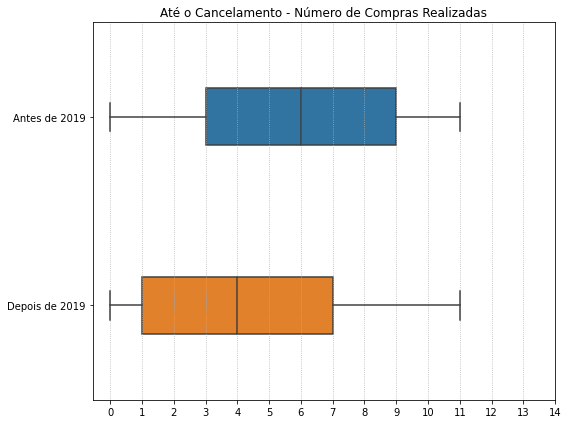

In [96]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.boxplot(data=[dados_antes['all_orders'], 
                  dados_depois['all_orders']],
                  orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Até o Cancelamento - Número de Compras Realizadas')
plt.xticks(np.arange(0,15,1))
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/box2.pdf", transparent=True)
plt.show()

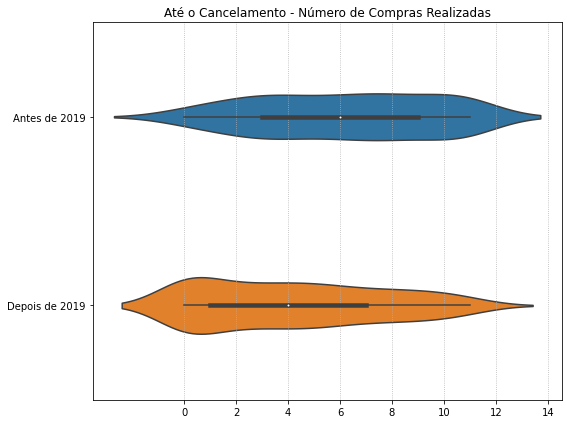

In [205]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]

plt.figure(figsize=(8,6))
sns.violinplot(data=[dados_antes['all_orders'], 
                     dados_depois['all_orders']],
               orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Até o Cancelamento - Número de Compras Realizadas')
plt.xticks(np.arange(0,16,2))
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/violin2.pdf", transparent=True)
plt.show()

Ao comparar as distribuições de compras por cliente entre aqueles que se cadastraram antes e depois de 2019, nota-se que ambos os grupos tendem a realizar pedidos em regiões semelhantes. No entanto, a distribuição dos clientes que se cadastraram após 2019 apresenta menor variação, sugerindo um comportamento mais consistente em relação à quantidade média de itens adquiridos por compra. Isso pode indicar que esses clientes tendem a comprar uma quantidade semelhante de produtos por compra, independentemente de suas preferências específicas.

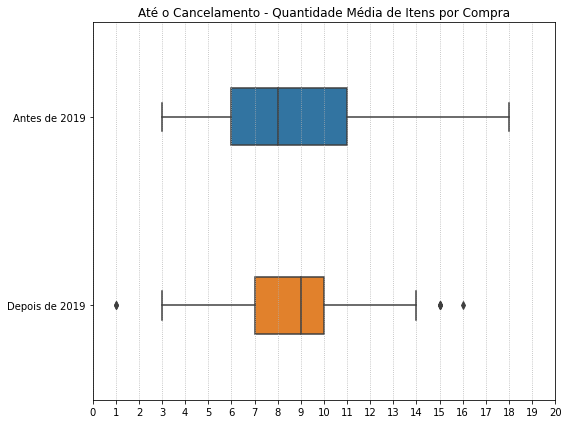

In [97]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.boxplot(data=[dados_antes['items_quantity'], 
                  dados_depois['items_quantity']],
                  orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Até o Cancelamento - Quantidade Média de Itens por Compra')
plt.xticks(np.arange(0,21,1))
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/box3.pdf", transparent=True)
plt.show()

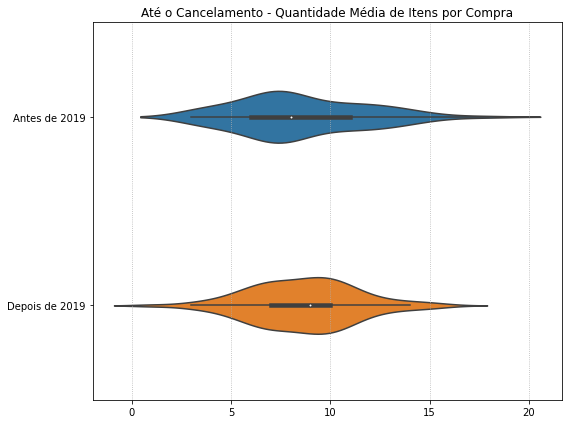

In [206]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]

plt.figure(figsize=(8,6))
sns.violinplot(data=[dados_antes['items_quantity'], 
                     dados_depois['items_quantity']],
               orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Até o Cancelamento - Quantidade Média de Itens por Compra')
#plt.xticks(np.arange(0,20,1))
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/violin3.pdf", transparent=True)
plt.show()

Ao analisar as distribuições de compras por cliente entre aqueles que se cadastraram antes e depois de 2019, podemos observar que ambos os grupos possuem um comportamento similar em relação ao valor médio de compra. Entretanto, ao analisar a dispersão dos dados, é possível perceber que os clientes cadastrados após 2019 apresentam uma variação menor, indicando um comportamento mais consistente em relação ao valor médio por compra. Esse resultado sugere que esses clientes têm uma maior clareza em relação às suas preferências em relação aos produtos que desejam adquirir.

Uma hipótese a ser considerada é que as pessoas que se cadastraram após 2019 e cancelaram suas assinaturas possuíam uma maior disposição para realizar compras e eram mais decididas e exigentes, apesar de estarem com suas assinaturas por um período menor de tempo.

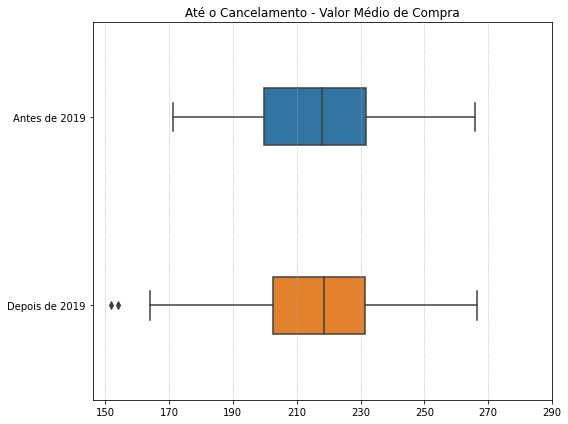

In [98]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.boxplot(data=[dados_antes['average_ticket'], 
                  dados_depois['average_ticket']],
                  orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Até o Cancelamento - Valor Médio de Compra')
plt.xticks(np.arange(150,300,20))
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/box4.pdf", transparent=True)
plt.show()

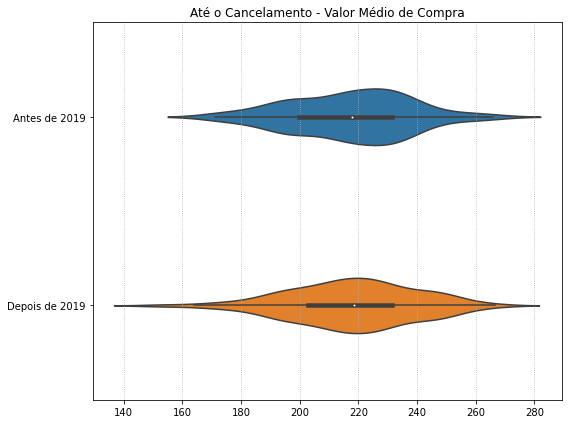

In [207]:
dados_antes = new_df[(new_df['status']=='canceled') &
                     (new_df['month_year_cancel'] > '2019-12') &
                     (new_df['quarter_sign'] < '2019-1')]

dados_depois = new_df[(new_df['status']=='canceled') &
                      (new_df['month_year_cancel'] > '2019-12') &
                      (new_df['quarter_sign'] >= '2019-1')]



plt.figure(figsize=(8,6))
sns.violinplot(data=[dados_antes['average_ticket'], 
                     dados_depois['average_ticket']],
               orient='horizontal', width=0.3)

plt.yticks([0,1], ['Antes de 2019', 'Depois de 2019'])
plt.title('Até o Cancelamento - Valor Médio de Compra')
#plt.xticks(np.arange(150,300,20))
plt.grid(linestyle=':', axis='x')
plt.tight_layout()
#plt.savefig("graficos/violin4.pdf", transparent=True)
plt.show()

# Discussão

Considerando todos os tópicos discutidos até aqui, é possível fazer algumas observações e levantar algumas hipóteses sobre possíveis problemas que estão ocorrendo. Uma das hipóteses é de que os assinantes estão insatisfeitos com os serviços prestados, visto que foi observada uma alta variação no tempo em que os clientes permaneceram com a assinatura quando a cancelaram em 2020, abrangendo desde clientes mais antigos até clientes mais recentes, com pouco tempo de uso. Também foi possível observar que os clientes que criaram suas assinaturas após 2019 e as cancelaram após de 2020 possuem hábitos mais exigentes.

Analisando as regiões, foi possível observar que os clientes de todas as regiões estão insatisfeitos com o serviço da assinatura, em especial os clientes das regiões Norte, Nordeste e Centro-Oeste.

Em relação aos canais de conversão, os cancelamentos partem de pessoas que, em sua grande maioria, chegaram por meio de busca orgânica e directs. Isso pode indicar que inicialmente o site oferecia exatamente o que o cliente estava buscando, mas as expectativas não foram atendidas.

Além disso, é importante considerar que a pandemia de COVID-19 pode estar influenciando as escolhas dos clientes em relação à assinatura. Com a pandemia, muitas pessoas estão passando por dificuldades financeiras, o que pode levá-las a cancelar serviços considerados supérfluos.

Todas essas hipóteses podem tentar explicar o motivo da queda no número de cadastros depois do 2º trimestre de 2020. É possível que o serviço não esteja sendo indicado por pessoas que foram assinantes da plataforma e, na perspectiva dos canais de conversão, como a busca orgânica, os produtos que os clientes em potencial podem estar buscando podem não estar disponíveis nos planos de assinatura.

# Próximos Passos

Diante disso, sugere-se que a plataforma realize uma análise detalhada dos feedbacks e pesquisas entre os clientes, a fim de identificar os principais pontos de insatisfação e atuar de forma mais assertiva na resolução desses problemas.

Outra sugestão é realizar uma otimização dos canais de conversão, identificando quais são os produtos que os clientes em potencial podem estar buscando e verificando se esses produtos estão disponíveis nos planos de assinatura. Além disso, é importante considerar a possibilidade de oferecer novos serviços que possam atrair e reter clientes.

Investir na satisfação dos clientes das regiões Norte, Nordeste e Centro-Oeste. É possível que existam diferenças culturais e sociais nessas regiões que afetem a percepção dos clientes em relação ao serviço. Por isso, é importante investir em iniciativas específicas para essas regiões e entender melhor as necessidades e expectativas dos clientes locais.

Por fim, é fundamental que a plataforma trabalhe na fidelização dos clientes, buscando sempre oferecer serviços de qualidade e atuando de forma proativa na solução de problemas. Dessa forma, será possível reduzir o churn e manter um número crescente de assinantes.